In [24]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Load Test, Train set

In [14]:
X = pd.read_csv("PreProcessingDatas/4.trainData.csv")
Y = X.pop('class')

In [15]:
X_test = pd.read_csv("PreProcessingDatas/4.testData.csv")
Y_test = X_test.pop('class')

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)

# 2. Train Model
## 2.1 KNN Model

In [18]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [22]:
score = kNN.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.7047619047619048


In [23]:
y_pred = kNN.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.96      0.81       346
        True       0.71      0.20      0.31       175

    accuracy                           0.70       521
   macro avg       0.71      0.58      0.56       521
weighted avg       0.71      0.70      0.64       521



In [25]:
categories = ['True', 'False']

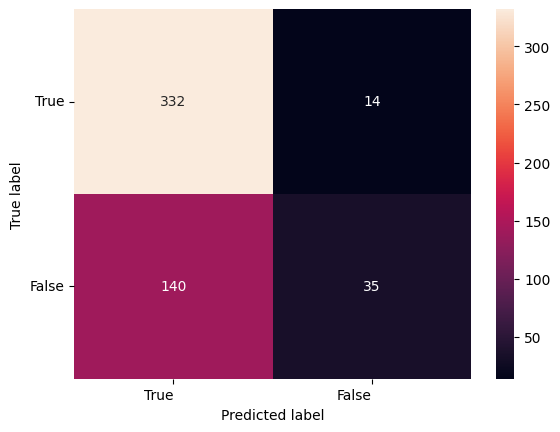

In [27]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.2 Decision Tree

In [28]:
decisionTreeModel = DecisionTreeClassifier(random_state=42)

decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
score = decisionTreeModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6857142857142857


In [31]:
y_pred = decisionTreeModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.95      0.87       346
        True       0.83      0.54      0.66       175

    accuracy                           0.81       521
   macro avg       0.82      0.74      0.76       521
weighted avg       0.81      0.81      0.80       521



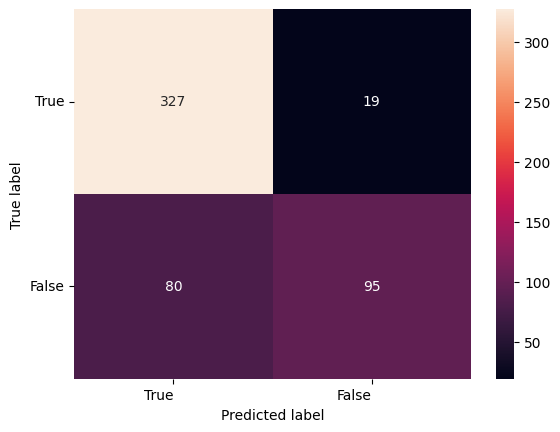

In [32]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.3 Random Forest Model

In [33]:
randomForestModel = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [35]:
score = randomForestModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6952380952380952


In [36]:
y_pred = randomForestModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.68      1.00      0.81       346
        True       1.00      0.05      0.10       175

    accuracy                           0.68       521
   macro avg       0.84      0.53      0.45       521
weighted avg       0.78      0.68      0.57       521



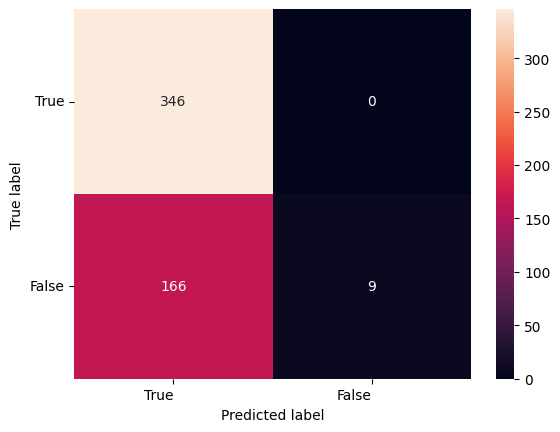

In [37]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.5 Support Vector Machine (SVM)

In [38]:
from sklearn import svm

svmModel = svm.SVC(kernel='linear', gamma='auto', C=2)
svmModel.fit(X_train, Y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [39]:
score = svmModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6666666666666666


In [40]:
y_pred = svmModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.86      0.77       346
        True       0.50      0.27      0.35       175

    accuracy                           0.66       521
   macro avg       0.60      0.57      0.56       521
weighted avg       0.63      0.66      0.63       521



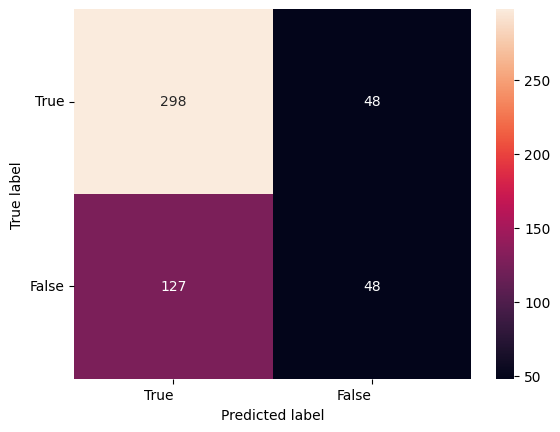

In [41]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# Save Model
import joblib

path = "Models/"

joblib.dump(kNN, 'KNN_model.pkl')
joblib.dump(randomForestModel, 'KNN_model.pkl')
joblib.dump(decisionTreeModel, 'KNN_model.pkl')
joblib.dump(svmModel, 'KNN_model.pkl')